In [1]:
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [2]:
lst_data = glob('./data/*')
var_data = ['cust_demo', 'prod_buy', 'service_use', 'prod_cat', 'partner', 'lpay']
for name, file in zip(var_data, lst_data):
    globals()[name] = pd.read_csv(file)

C:\Users\KwonYujin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
for name in var_data:
    print(name, ': ', globals()[name].shape)

cust_demo :  (29913, 4)
prod_buy :  (4381743, 10)
service_use :  (248304, 9)
prod_cat :  (1933, 4)
partner :  (8808, 4)
lpay :  (353184, 7)


In [15]:
prod_buy['de_dt'] = pd.to_datetime(prod_buy.de_dt, format='%Y%m%d')
prod_buy['de_month'] = prod_buy.de_dt.dt.month

service_use['de_dt'] = pd.to_datetime(service_use.de_dt, format='%Y%m%d')
service_use['de_month'] = service_use.de_dt.dt.month

#### 거래 수단(lpay)에 따른 비교

In [47]:
lpay_cust = lpay.cust.unique()
prod_lpay_cust = prod_buy.query('cust in @lpay_cust')
service_lpay_cust = service_use.query('cust in @lpay_cust')

In [9]:
lpay['de_dt'] = pd.to_datetime(lpay.de_dt, format='%Y%m%d')
lpay['de_month'] = lpay.de_dt.dt.month

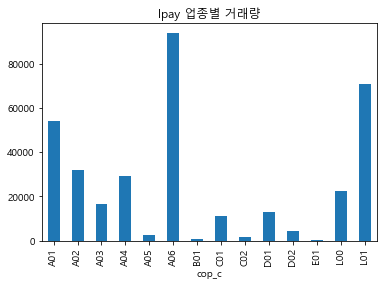

In [12]:
lpay.groupby('cop_c').rct_no.count().plot.bar()
plt.title('lpay 업종별 거래량')
plt.show()

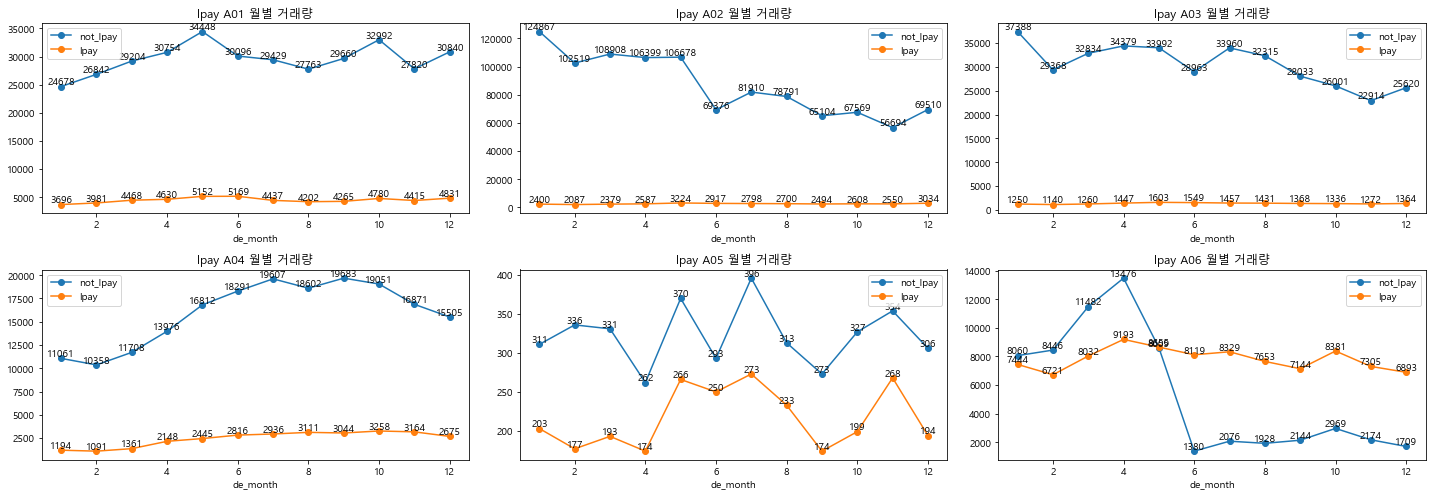

In [92]:
fig, axes = plt.subplots(2,3, figsize=(20,7))
lst = sorted(prod_only_lpay.cop_c.unique())

for i, cop in enumerate(lst):
    data1 = prod_only_lpay.query(f'cop_c == "{cop}"').groupby('de_month').rct_no.count()
    data1.plot(label='not_lpay', marker='o', ax=axes[i//3, i%3])
    data2 = lpay.query(f'cop_c == "{cop}"').groupby('de_month').rct_no.count()
    data2.plot(label='lpay', marker='o', ax=axes[i//3, i%3])
    for idx, value in enumerate(data1, start=1):
        axes[i//3, i%3].text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
    for idx, value in enumerate(data2, start=1):
        axes[i//3, i%3].text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
    axes[i//3, i%3].set_title(f'lpay {cop} 월별 거래량')
    axes[i//3, i%3].legend()
plt.tight_layout()
plt.show()

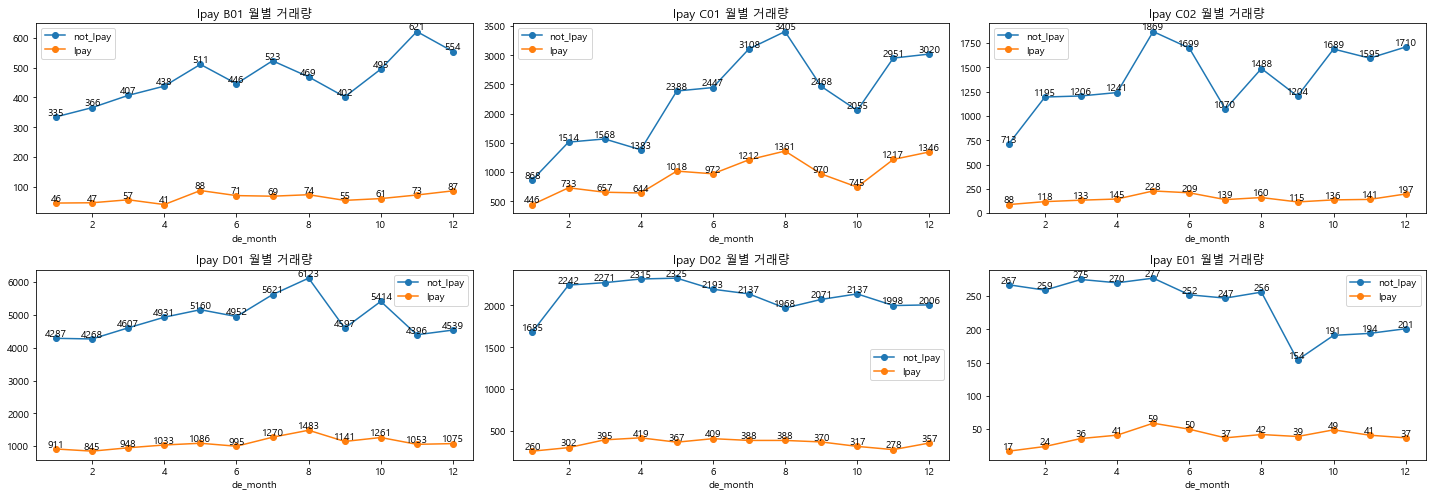

In [91]:
fig, axes = plt.subplots(2,3, figsize=(20,7))
lst = sorted(service_only_lpay.cop_c.unique())

for i, cop in enumerate(lst):
    data1 = service_only_lpay.query(f'cop_c == "{cop}"').groupby('de_month').rct_no.count()
    data1.plot(label='not_lpay', marker='o', ax=axes[i//3, i%3])
    data2 = lpay.query(f'cop_c == "{cop}"').groupby('de_month').rct_no.count()
    data2.plot(label='lpay', marker='o', ax=axes[i//3, i%3])
    for idx, value in enumerate(data1, start=1):
        axes[i//3, i%3].text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
    for idx, value in enumerate(data2, start=1):
        axes[i//3, i%3].text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
    axes[i//3, i%3].set_title(f'lpay {cop} 월별 거래량')
    axes[i//3, i%3].legend()
plt.tight_layout()
plt.show()

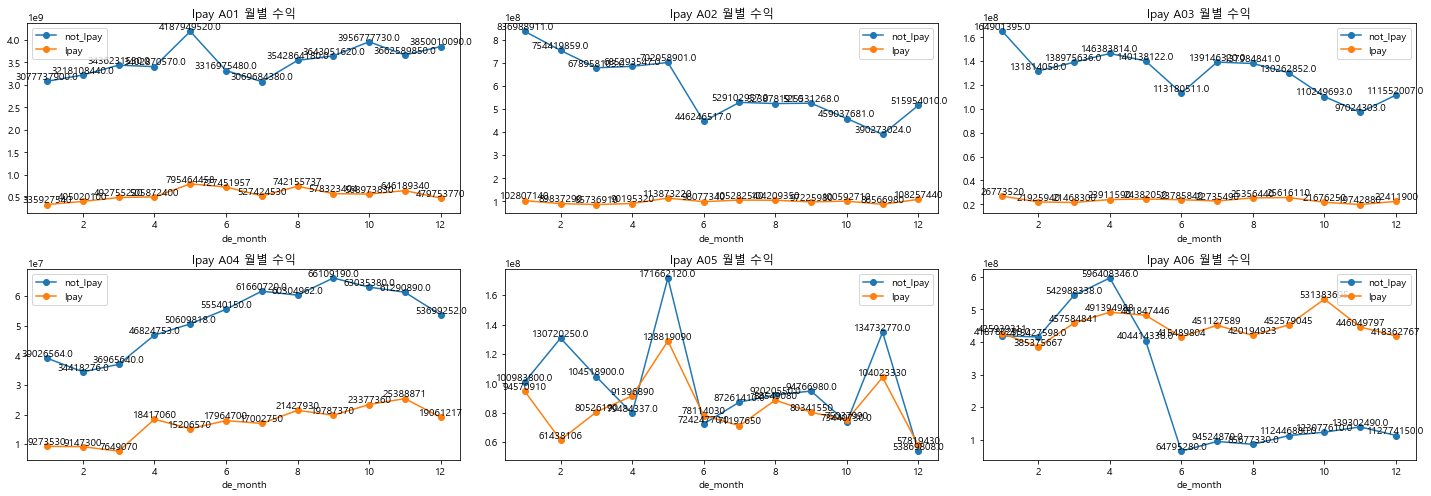

In [90]:
fig, axes = plt.subplots(2,3, figsize=(20,7))
lst = sorted(prod_only_lpay.cop_c.unique())

for i, cop in enumerate(lst):
    data1 = prod_only_lpay.query(f'cop_c == "{cop}"').groupby('de_month').buy_am.sum()
    data1.plot(label='not_lpay', marker='o', ax=axes[i//3, i%3])
    data2 = lpay.query(f'cop_c == "{cop}"').groupby('de_month').buy_am.sum()
    data2.plot(label='lpay', marker='o', ax=axes[i//3, i%3])
    for idx, value in enumerate(data1, start=1):
        axes[i//3, i%3].text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
    for idx, value in enumerate(data2, start=1):
        axes[i//3, i%3].text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
    axes[i//3, i%3].set_title(f'lpay {cop} 월별 수익')
    axes[i//3, i%3].legend()
plt.tight_layout()
plt.show()

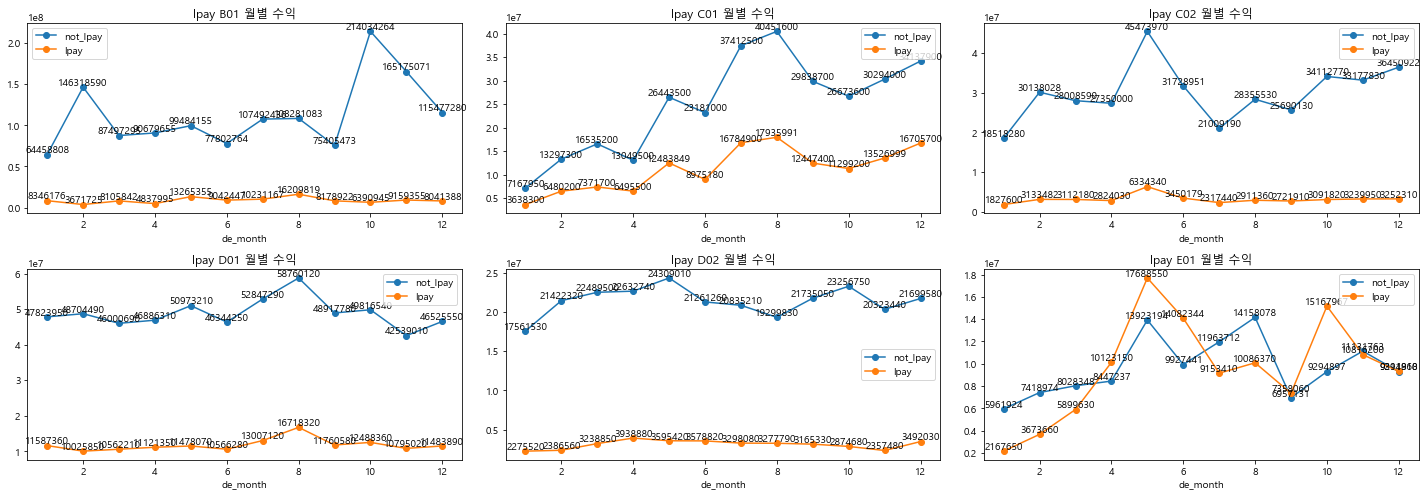

In [88]:
fig, axes = plt.subplots(2,3, figsize=(20,7))
lst = sorted(service_only_lpay.cop_c.unique())

for i, cop in enumerate(lst):
    data1 = service_only_lpay.query(f'cop_c == "{cop}"').groupby('de_month').buy_am.sum()
    data1.plot(label='not_lpay', marker='o', ax=axes[i//3, i%3])
    data2 = lpay.query(f'cop_c == "{cop}"').groupby('de_month').buy_am.sum()
    data2.plot(label='lpay', marker='o', ax=axes[i//3, i%3])
    for idx, value in enumerate(data1, start=1):
        axes[i//3, i%3].text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
    for idx, value in enumerate(data2, start=1):
        axes[i//3, i%3].text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
    axes[i//3, i%3].set_title(f'lpay {cop} 월별 수익')
    axes[i//3, i%3].legend()
plt.tight_layout()
plt.show()

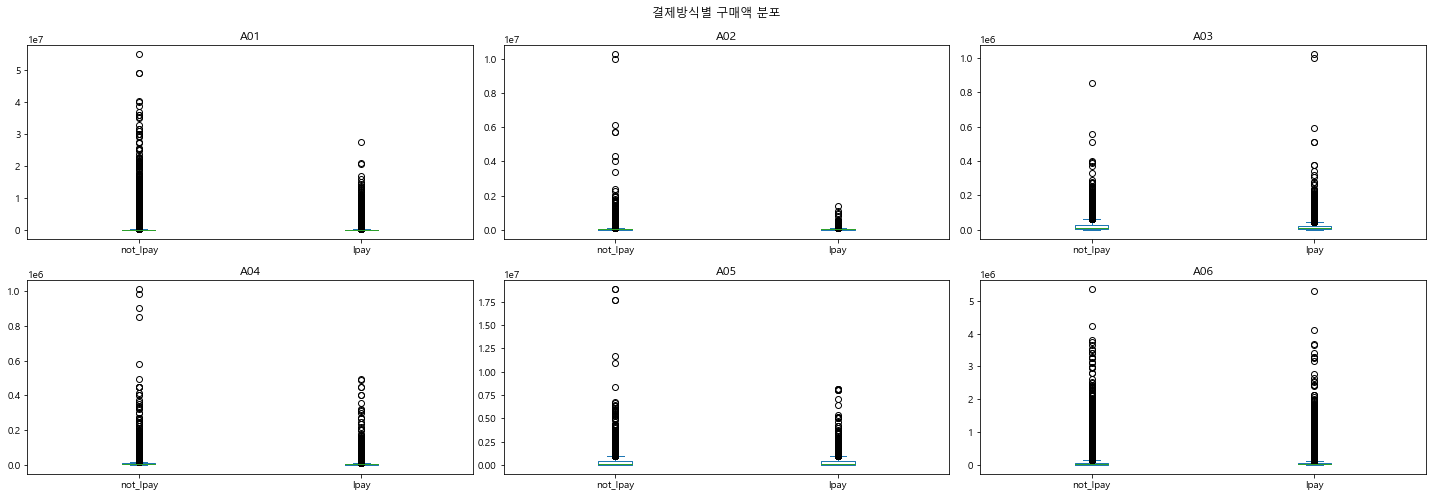

In [99]:
fig, axes = plt.subplots(2,3, figsize=(20,7))
lst = sorted(prod_only_lpay.cop_c.unique())

for i, cop in enumerate(lst):
    data = pd.DataFrame({'not_lpay':prod_only_lpay.query(f'cop_c == "{cop}"').groupby('rct_no').buy_am.sum(),
                'lpay':lpay.query(f'cop_c == "{cop}"').groupby('rct_no').buy_am.sum()})
    data.plot.box(ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{cop}')
plt.suptitle('결제방식별 구매액 분포')
plt.tight_layout()
plt.show()

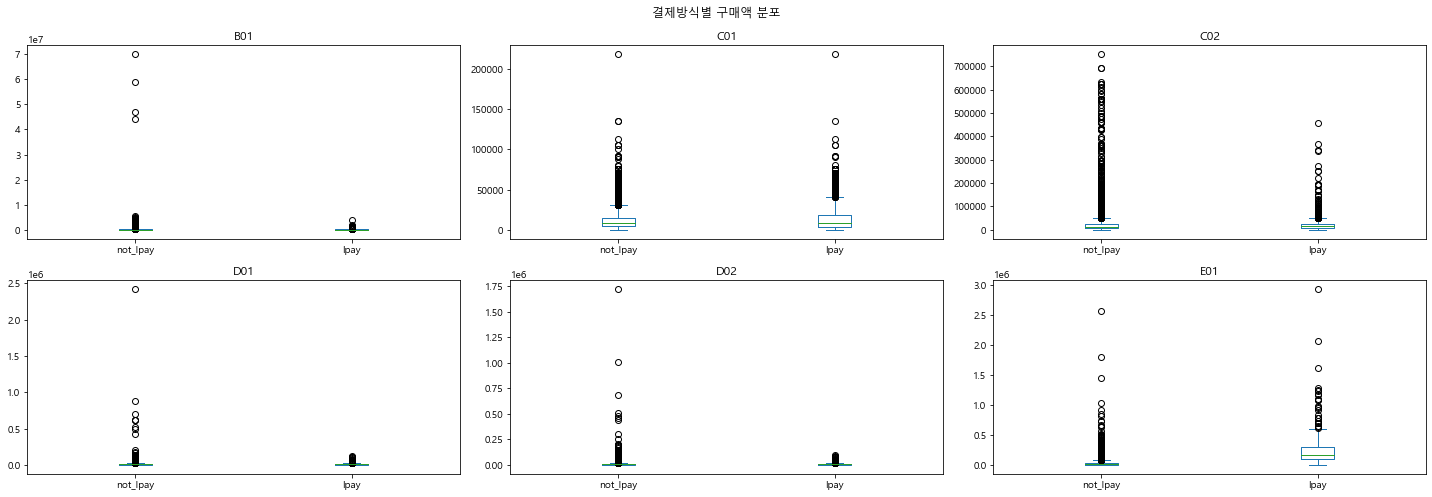

In [100]:
fig, axes = plt.subplots(2,3, figsize=(20,7))
lst = sorted(service_only_lpay.cop_c.unique())

for i, cop in enumerate(lst):
    data = pd.DataFrame({'not_lpay':service_only_lpay.query(f'cop_c == "{cop}"').groupby('rct_no').buy_am.sum(),
                'lpay':lpay.query(f'cop_c == "{cop}"').groupby('rct_no').buy_am.sum()})
    data.plot.box(ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{cop}')
plt.suptitle('결제방식별 구매액 분포')
plt.tight_layout()
plt.show()

In [104]:
prod_buy

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,de_month
0,M430112881,A01000001113,1,A01,A010039,PD0290,2021-01-01,10,15000.0,1,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,2021-01-01,10,79700.0,1,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1,12
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1,12
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1,12
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,2021-12-31,23,50000.0,1,12


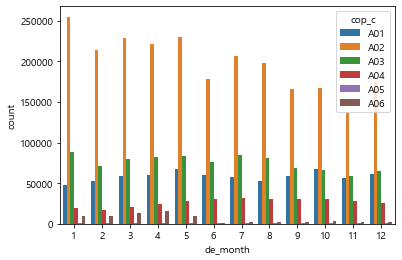

In [107]:
sns.countplot(data=prod_buy, x='de_month', hue='cop_c')
plt.show()

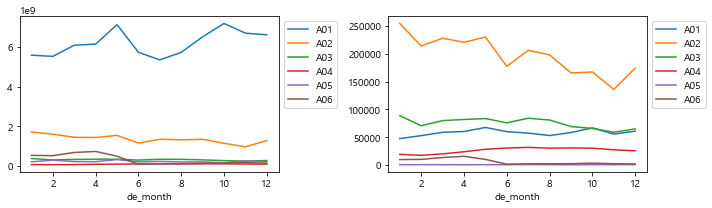

In [113]:
fig, axes = plt.subplots(1,2,figsize=(10,3))
pd.pivot_table(data=prod_buy, columns='cop_c', index='de_month', values='buy_am', aggfunc='sum', fill_value=0).plot(ax=axes[0])
pd.pivot_table(data=prod_buy, columns='cop_c', index='de_month', values='buy_am', aggfunc='count', fill_value=0).plot(ax=axes[1])
axes[0].legend(bbox_to_anchor=[1,1])
axes[1].legend(bbox_to_anchor=[1,1])
plt.tight_layout()
plt.show()